In [1]:
import numpy  as np
import pandas as pd
import umap
import os, sys
import matplotlib.pyplot as plt
import seaborn as sns

sys.path.append('..')
from config.config_sing import *
show_env()

You are in Singularity: singularity_proj_encode_fcc
BASE DIRECTORY (FD_BASE): /data/reddylab/Kuei
WORK DIRECTORY (FD_WORK): /data/reddylab/Kuei/out
CODE DIRECTORY (FD_CODE): /data/reddylab/Kuei/code
PATH OF PROJECT (FD_PRJ): /data/reddylab/Kuei/code/Proj_CombEffect_ENCODE_FCC
PATH OF RESULTS (FD_RES): /data/reddylab/Kuei/out/proj_combeffect_encode_fcc
PATH OF LOG     (FD_LOG): /data/reddylab/Kuei/out/proj_combeffect_encode_fcc/log



## Import data

In [2]:
fdiry = os.path.join(
    FD_RES, 
    "results", 
    "region",
    "KS91_K562_ASTARRseq_peak_macs_input",
    "summary"
)
fname = "peak.summary.chipseq_tf.tsv"
fpath = os.path.join(fdiry, fname)

### read data
dat = pd.read_csv(fpath, sep="\t")

### spread into a count matrix
dat = dat.pivot(index='Peak', columns='Label', values='Count').fillna(0)
dat_chipseq_tf_count = dat

### convert into binary matrix
dat = (dat != 0)
dat = dat.astype(int)
dat_chipseq_tf_binary = dat

In [3]:
dat_chipseq_tf_count

Label,ADNP_ENCFF739AJO,AFF1_ENCFF195YGC,AFF1_ENCFF674XTY,AGO1_ENCFF794IRP,ARHGAP35_ENCFF952WKN,ARID1B_ENCFF879NTL,ARID2_ENCFF913WRW,ARID3A_ENCFF891OQP,ARID3B_ENCFF270TSN,ARID4B_ENCFF086FAZ,...,ZNF7_ENCFF018HWM,ZNF830_ENCFF150ZBY,ZNF830_ENCFF672NBD,ZNF830_ENCFF896IUI,ZNF83_ENCFF451LLC,ZNF84_ENCFF014HYS,ZSCAN29_ENCFF151WYQ,ZSCAN29_ENCFF407STM,ZSCAN32_ENCFF537HHU,ZZZ3_ENCFF797VEK
Peak,,,,,,,,,,,,,,,,,,,,,
chr10_100009096_100010466,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
chr10_100045961_100046653,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
chr10_100065094_100065486,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
chr10_100111648_100111979,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
chr10_100129051_100131059,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
chrX_98850591_98850902,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
chrX_9885196_9885587,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
chrX_9894544_9895641,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
dat_chipseq_tf_binary

Label,ADNP_ENCFF739AJO,AFF1_ENCFF195YGC,AFF1_ENCFF674XTY,AGO1_ENCFF794IRP,ARHGAP35_ENCFF952WKN,ARID1B_ENCFF879NTL,ARID2_ENCFF913WRW,ARID3A_ENCFF891OQP,ARID3B_ENCFF270TSN,ARID4B_ENCFF086FAZ,...,ZNF7_ENCFF018HWM,ZNF830_ENCFF150ZBY,ZNF830_ENCFF672NBD,ZNF830_ENCFF896IUI,ZNF83_ENCFF451LLC,ZNF84_ENCFF014HYS,ZSCAN29_ENCFF151WYQ,ZSCAN29_ENCFF407STM,ZSCAN32_ENCFF537HHU,ZZZ3_ENCFF797VEK
Peak,,,,,,,,,,,,,,,,,,,,,
chr10_100009096_100010466,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
chr10_100045961_100046653,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
chr10_100065094_100065486,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
chr10_100111648_100111979,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
chr10_100129051_100131059,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
chrX_98850591_98850902,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
chrX_9885196_9885587,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
chrX_9894544_9895641,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## UMAP

In [7]:
X = dat_chipseq_tf_count.to_numpy()
X = X.T
X.shape

(733, 151753)

In [8]:
fit = umap.UMAP(metric='manhattan', random_state=123)
%time U_count = fit.fit_transform(X)

CPU times: user 1min 20s, sys: 1.66 s, total: 1min 22s
Wall time: 1min 21s


In [11]:
dat = pd.DataFrame(U_count, columns=['X', 'Y'])
dat['Label'] = dat_chipseq_tf_count.columns

dat_umap_count = dat
dat

,X,Y,Label
0,-3.222795,15.331758,ADNP_ENCFF739AJO
1,-2.351503,13.517810,AFF1_ENCFF195YGC
2,-2.722846,15.682391,AFF1_ENCFF674XTY
3,-1.117855,15.983297,AGO1_ENCFF794IRP
4,-2.108905,15.475662,ARHGAP35_ENCFF952WKN
...,...,...,...
728,-1.108245,18.265520,ZNF84_ENCFF014HYS
729,-2.930557,15.162867,ZSCAN29_ENCFF151WYQ
730,-3.061774,15.271389,ZSCAN29_ENCFF407STM
731,-1.918890,18.004429,ZSCAN32_ENCFF537HHU


In [12]:
X = dat_chipseq_tf_binary.to_numpy()
X = X.T
X.shape

(733, 151753)

In [13]:
fit = umap.UMAP(metric='manhattan', random_state=123)
%time U_binary = fit.fit_transform(X)

CPU times: user 1min 9s, sys: 1.82 s, total: 1min 11s
Wall time: 1min 10s


In [14]:
dat = pd.DataFrame(U_binary, columns=['X', 'Y'])
dat['Label'] = dat_chipseq_tf_binary.columns

dat_umap_binary = dat
dat

,X,Y,Label
0,0.740344,-6.018846,ADNP_ENCFF739AJO
1,0.977328,-3.857019,AFF1_ENCFF195YGC
2,1.294563,-6.423658,AFF1_ENCFF674XTY
3,3.039052,-5.000734,AGO1_ENCFF794IRP
4,2.298833,-5.419095,ARHGAP35_ENCFF952WKN
...,...,...,...
728,3.750388,-7.435053,ZNF84_ENCFF014HYS
729,1.147969,-5.539460,ZSCAN29_ENCFF151WYQ
730,1.018553,-5.731629,ZSCAN29_ENCFF407STM
731,3.230607,-7.708544,ZSCAN32_ENCFF537HHU


## Save results

In [97]:
fdiry = os.path.join(
    FD_RES, 
    "results", 
    "region",
    "KS91_K562_ASTARRseq_peak_macs_input",
    "summary"
)
fname = "peak.summary.chipseq_tf.umap.count.tsv"
fpath = os.path.join(fdiry, fname)

dat = dat_umap_count
dat.to_csv(fpath, sep="\t", index=False)

In [98]:
fdiry = os.path.join(
    FD_RES, 
    "results", 
    "region",
    "KS91_K562_ASTARRseq_peak_macs_input",
    "summary"
)
fname = "peak.summary.chipseq_tf.umap.binary.tsv"
fpath = os.path.join(fdiry, fname)

dat = dat_umap_binary
dat.to_csv(fpath, sep="\t", index=False)

## Quick plot

In [54]:
target = dat_chipseq_tf_count.columns.str.split(pat="_").str[0]
U      = U_count

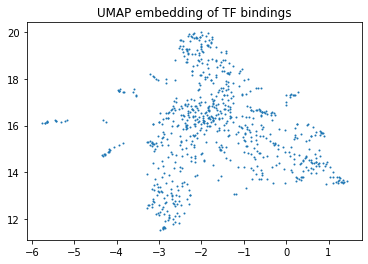

In [55]:
plt.scatter(U[:,0], U[:,1], s=1)
plt.title('UMAP embedding of TF bindings');

5


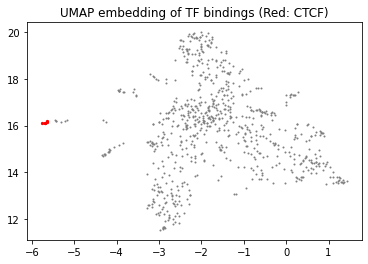

In [56]:
idx = np.where(target == "CTCF")[0]
print(len(idx))

plt.scatter(U[:,  0], U[:,  1], s=1, c="grey")
plt.scatter(U[idx,0], U[idx,1], s=5, c="red")
plt.title('UMAP embedding of TF bindings (Red: CTCF)');

[240 241 242 243 244 245 246 247]
Index(['JUNB', 'JUNB', 'JUNB', 'JUND', 'JUND', 'JUN', 'JUN', 'JUN'], dtype='object', name='Label')


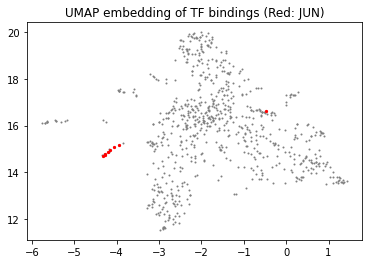

In [57]:
idx = np.where(target.str.contains("JUN"))[0]
print(idx)
print(target[idx])

plt.scatter(U[:,  0], U[:,  1], s=1, c="grey")
plt.scatter(U[idx,0], U[idx,1], s=5, c="red")
plt.title('UMAP embedding of TF bindings (Red: JUN)');

[388 389 390 391 392 393 394 395 396 397 398 399]
Index(['POLR2A', 'POLR2A', 'POLR2A', 'POLR2A', 'POLR2A', 'POLR2A',
       'POLR2AphosphoS2', 'POLR2AphosphoS2', 'POLR2AphosphoS5', 'POLR2B',
       'POLR2G', 'POLR2H'],
      dtype='object', name='Label')
[394 395 396]
Index(['POLR2AphosphoS2', 'POLR2AphosphoS2', 'POLR2AphosphoS5'], dtype='object', name='Label')


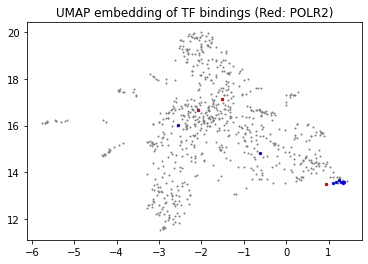

In [58]:
idx = np.where(target.str.contains("POLR2"))[0]
print(idx)
print(target[idx])

plt.scatter(U[:,  0], U[:,  1], s=1, c="grey")
plt.scatter(U[idx,0], U[idx,1], s=5, c="blue")

idx = np.where(target.str.contains("POLR2Aphospho"))[0]
print(idx)
print(target[idx])
plt.scatter(U[idx,0], U[idx,1], s=5, c="red")

plt.title('UMAP embedding of TF bindings (Red: POLR2)');

[176 177 178 179 180 181 182 183]
Index(['GATA1', 'GATA1', 'GATA2', 'GATA2', 'GATA2', 'GATA2', 'GATAD2A',
       'GATAD2B'],
      dtype='object', name='Label')


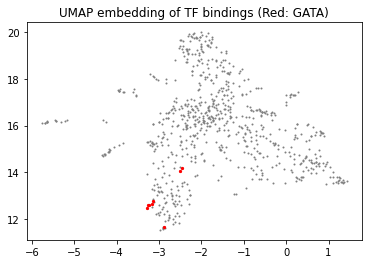

In [59]:
idx = np.where(target.str.contains("GATA"))[0]
print(idx)
print(target[idx])

plt.scatter(U[:,  0], U[:,  1], s=1, c="grey")
plt.scatter(U[idx,0], U[idx,1], s=5, c="red")
plt.title('UMAP embedding of TF bindings (Red: GATA)');

6
Index(['GATA1', 'GATA1', 'GATA2', 'GATA2', 'GATA2', 'GATA2'], dtype='object', name='Label')


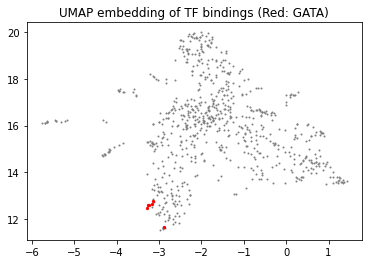

In [60]:
idx = np.where((target == "GATA1") | (target == "GATA2"))[0]
print(len(idx))
print(target[idx])

plt.scatter(U[:,  0], U[:,  1], s=1, c="grey")
plt.scatter(U[idx,0], U[idx,1], s=5, c="red")
plt.title('UMAP embedding of TF bindings (Red: GATA)');

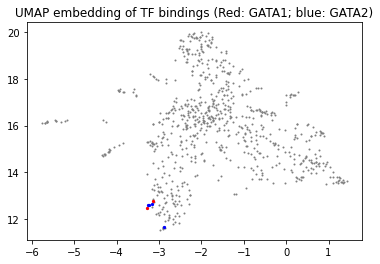

In [61]:
plt.scatter(U[:,  0], U[:,  1], s=1, c="grey")

idx = np.where(target.str.contains("GATA1"))[0]
plt.scatter(U[idx,0], U[idx,1], s=5, c="red")

idx = np.where(target.str.contains("GATA2"))[0]
plt.scatter(U[idx,0], U[idx,1], s=5, c="blue")

plt.title('UMAP embedding of TF bindings (Red: GATA1; blue: GATA2)');

In [62]:
target = dat_chipseq_tf_count.columns.str.split(pat="_").str[0]
U      = U_binary

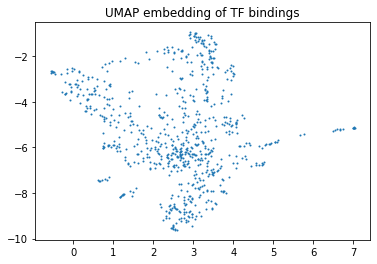

In [63]:
plt.scatter(U[:,0], U[:,1], s=1)
plt.title('UMAP embedding of TF bindings');

5


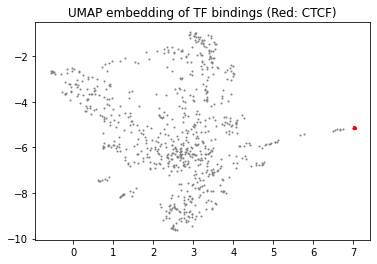

In [64]:
idx = np.where(target == "CTCF")[0]
print(len(idx))

plt.scatter(U[:,  0], U[:,  1], s=1, c="grey")
plt.scatter(U[idx,0], U[idx,1], s=5, c="red")
plt.title('UMAP embedding of TF bindings (Red: CTCF)');

[240 241 242 243 244 245 246 247]
Index(['JUNB', 'JUNB', 'JUNB', 'JUND', 'JUND', 'JUN', 'JUN', 'JUN'], dtype='object', name='Label')


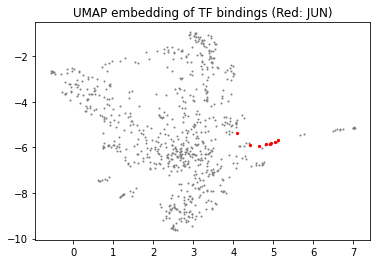

In [65]:
idx = np.where(target.str.contains("JUN"))[0]
print(idx)
print(target[idx])

plt.scatter(U[:,  0], U[:,  1], s=1, c="grey")
plt.scatter(U[idx,0], U[idx,1], s=5, c="red")
plt.title('UMAP embedding of TF bindings (Red: JUN)');

[388 389 390 391 392 393 394 395 396 397 398 399]
Index(['POLR2A', 'POLR2A', 'POLR2A', 'POLR2A', 'POLR2A', 'POLR2A',
       'POLR2AphosphoS2', 'POLR2AphosphoS2', 'POLR2AphosphoS5', 'POLR2B',
       'POLR2G', 'POLR2H'],
      dtype='object', name='Label')
[394 395 396]
Index(['POLR2AphosphoS2', 'POLR2AphosphoS2', 'POLR2AphosphoS5'], dtype='object', name='Label')


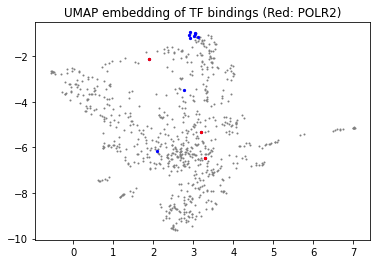

In [66]:
idx = np.where(target.str.contains("POLR2"))[0]
print(idx)
print(target[idx])

plt.scatter(U[:,  0], U[:,  1], s=1, c="grey")
plt.scatter(U[idx,0], U[idx,1], s=5, c="blue")

idx = np.where(target.str.contains("POLR2Aphospho"))[0]
print(idx)
print(target[idx])
plt.scatter(U[idx,0], U[idx,1], s=5, c="red")

plt.title('UMAP embedding of TF bindings (Red: POLR2)');

[176 177 178 179 180 181 182 183]
Index(['GATA1', 'GATA1', 'GATA2', 'GATA2', 'GATA2', 'GATA2', 'GATAD2A',
       'GATAD2B'],
      dtype='object', name='Label')


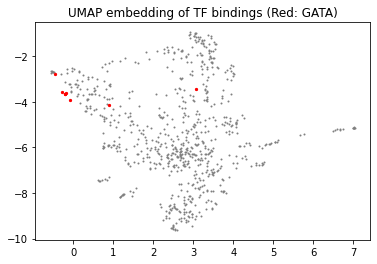

In [67]:
idx = np.where(target.str.contains("GATA"))[0]
print(idx)
print(target[idx])

plt.scatter(U[:,  0], U[:,  1], s=1, c="grey")
plt.scatter(U[idx,0], U[idx,1], s=5, c="red")
plt.title('UMAP embedding of TF bindings (Red: GATA)');

6
Index(['GATA1', 'GATA1', 'GATA2', 'GATA2', 'GATA2', 'GATA2'], dtype='object', name='Label')


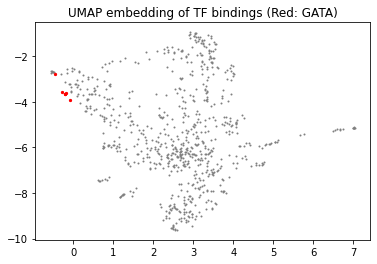

In [68]:
idx = np.where((target == "GATA1") | (target == "GATA2"))[0]
print(len(idx))
print(target[idx])

plt.scatter(U[:,  0], U[:,  1], s=1, c="grey")
plt.scatter(U[idx,0], U[idx,1], s=5, c="red")
plt.title('UMAP embedding of TF bindings (Red: GATA)');

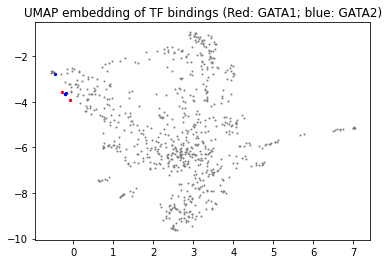

In [69]:
plt.scatter(U[:,  0], U[:,  1], s=1, c="grey")

idx = np.where(target.str.contains("GATA1"))[0]
plt.scatter(U[idx,0], U[idx,1], s=5, c="red")

idx = np.where(target.str.contains("GATA2"))[0]
plt.scatter(U[idx,0], U[idx,1], s=5, c="blue")

plt.title('UMAP embedding of TF bindings (Red: GATA1; blue: GATA2)');

5
Index(['CTCF', 'CTCF', 'CTCF', 'CTCF', 'CTCF'], dtype='object', name='Label')
8
Index(['JUNB', 'JUNB', 'JUNB', 'JUND', 'JUND', 'JUN', 'JUN', 'JUN'], dtype='object', name='Label')
3
Index(['FOSL1', 'FOSL1', 'FOS'], dtype='object', name='Label')
6
Index(['GATA1', 'GATA1', 'GATA2', 'GATA2', 'GATA2', 'GATA2'], dtype='object', name='Label')


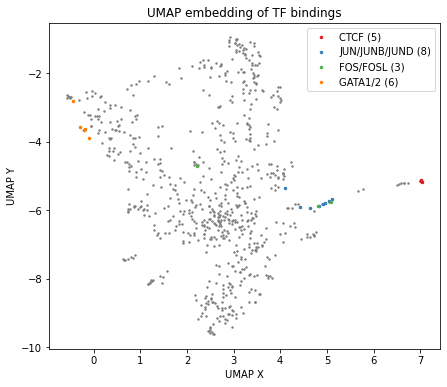

In [95]:
plt.figure(figsize=(7, 6))
plt.scatter(U[:,  0], U[:,  1], s=2, c="grey")
plt.xlabel("UMAP X")
plt.ylabel("UMAP Y")

idx = np.where(target == "CTCF")[0]
plt.scatter(U[idx,0], U[idx,1], s=6, c="#e41a1c", label="CTCF (5)")
print(len(idx))
print(target[idx])

idx = np.where(target.str.contains("JUN"))[0]
plt.scatter(U[idx,0], U[idx,1], s=6, c="#377eb8", label="JUN/JUNB/JUND (8)")
print(len(idx))
print(target[idx])

idx = np.where(target.str.contains("FOS"))[0]
plt.scatter(U[idx,0], U[idx,1], s=6, c="#4daf4a", label="FOS/FOSL (3)")
print(len(idx))
print(target[idx])

idx = np.where((target == "GATA1") | (target == "GATA2"))[0]
plt.scatter(U[idx,0], U[idx,1], s=6, c="#ff7f00", label="GATA1/2 (6)")
print(len(idx))
print(target[idx])

plt.title('UMAP embedding of TF bindings');
plt.legend()

In [90]:
target.unique()

Index(['ADNP', 'AFF1', 'AGO1', 'ARHGAP35', 'ARID1B', 'ARID2', 'ARID3A',
       'ARID3B', 'ARID4B', 'ARNT',
       ...
       'ZNF780A', 'ZNF785', 'ZNF79', 'ZNF7', 'ZNF830', 'ZNF83', 'ZNF84',
       'ZSCAN29', 'ZSCAN32', 'ZZZ3'],
      dtype='object', name='Label', length=514)

In [7]:
X = dat_chipseq_tf.to_numpy()
X = X.T
X.shape

(733, 151753)

In [8]:
fit = umap.UMAP(metric='manhattan')
%time Y = fit.fit_transform(X)

CPU times: user 1min 31s, sys: 1.93 s, total: 1min 33s
Wall time: 1min 22s


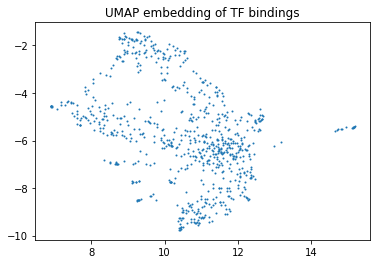

In [9]:
plt.scatter(Y[:,0], Y[:,1], s=1)
plt.title('UMAP embedding of TF bindings');

In [10]:
target = dat_chipseq_tf.columns.str.split(pat="_").str[0]
target

Index(['ADNP', 'AFF1', 'AFF1', 'AGO1', 'ARHGAP35', 'ARID1B', 'ARID2', 'ARID3A',
       'ARID3B', 'ARID4B',
       ...
       'ZNF7', 'ZNF830', 'ZNF830', 'ZNF830', 'ZNF83', 'ZNF84', 'ZSCAN29',
       'ZSCAN29', 'ZSCAN32', 'ZZZ3'],
      dtype='object', name='Label', length=733)

5


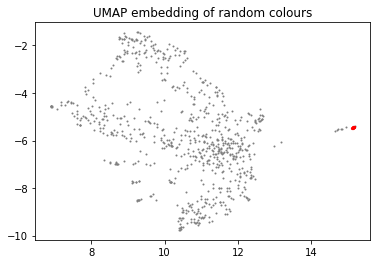

In [12]:
idx = np.where(target == "CTCF")[0]
print(len(idx))

plt.scatter(Y[:,  0], Y[:,  1], s=1, c="grey")
plt.scatter(Y[idx,0], Y[idx,1], s=5, c="red")
plt.title('UMAP embedding of random colours');

In [15]:
dat = pd.DataFrame(Y, columns=['x', 'y'])
dat['target'] = dat_chipseq_tf.columns.str.split(pat="_").str[0]
dat

,x,y,target
0,9.919381,-6.307359,ADNP
1,8.900584,-4.974952,AFF1
2,10.565331,-5.753866,AFF1
3,11.641372,-4.935023,AGO1
4,10.692014,-6.106958,ARHGAP35
...,...,...,...
728,12.117852,-8.153212,ZNF84
729,9.990845,-5.771428,ZSCAN29
730,10.057896,-5.971041,ZSCAN29
731,11.786277,-8.131608,ZSCAN32


In [17]:
dat[dat.x > 14]

,x,y,target
88,15.121756,-5.455422,CTCF
89,15.159713,-5.414321,CTCF
90,15.161250,-5.424801,CTCF
91,15.146479,-5.434034,CTCF
92,15.096476,-5.458727,CTCF
100,14.640715,-5.586767,DEAF1
413,14.817372,-5.503321,RAD21
414,14.691837,-5.558699,RAD21
415,15.186248,-5.402820,RAD21
416,15.161139,-5.432556,RAD21


[176 177 178 179 180 181 182 183]
Index(['GATA1', 'GATA1', 'GATA2', 'GATA2', 'GATA2', 'GATA2', 'GATAD2A',
       'GATAD2B'],
      dtype='object', name='Label')


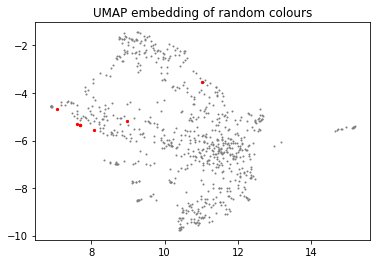

In [18]:
idx = np.where(target.str.contains("GATA"))[0]
print(idx)
print(target[idx])

plt.scatter(Y[:,  0], Y[:,  1], s=1, c="grey")
plt.scatter(Y[idx,0], Y[idx,1], s=5, c="red")
plt.title('UMAP embedding of random colours');

6
Index(['GATA1', 'GATA1', 'GATA2', 'GATA2', 'GATA2', 'GATA2'], dtype='object', name='Label')


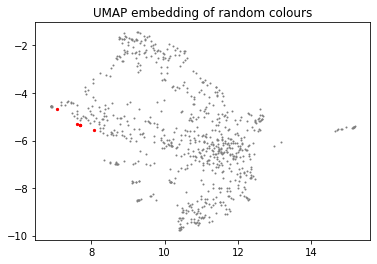

In [20]:
idx = np.where((target == "GATA1") | (target == "GATA2"))[0]
print(len(idx))
print(target[idx])

plt.scatter(Y[:,  0], Y[:,  1], s=1, c="grey")
plt.scatter(Y[idx,0], Y[idx,1], s=5, c="red")
plt.title('UMAP embedding of random colours');

5


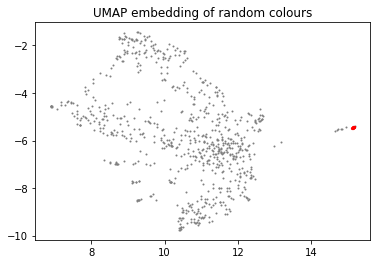

In [19]:
idx = np.where(target == "CTCF")[0]
print(len(idx))
print(target[idx])

plt.scatter(Y[:,  0], Y[:,  1], s=1, c="grey")
plt.scatter(Y[idx,0], Y[idx,1], s=5, c="red")
plt.title('UMAP embedding of random colours');

In [22]:
dat

,x,y,target
0,9.919381,-6.307359,ADNP
1,8.900584,-4.974952,AFF1
2,10.565331,-5.753866,AFF1
3,11.641372,-4.935023,AGO1
4,10.692014,-6.106958,ARHGAP35
...,...,...,...
728,12.117852,-8.153212,ZNF84
729,9.990845,-5.771428,ZSCAN29
730,10.057896,-5.971041,ZSCAN29
731,11.786277,-8.131608,ZSCAN32


In [18]:
fit = umap.UMAP(metric='manhattan')
%time U = fit.fit_transform(X)

CPU times: user 1min 14s, sys: 1.29 s, total: 1min 15s
Wall time: 1min 3s


In [19]:
U.shape

(733, 2)

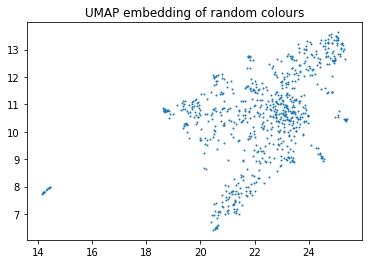

In [42]:
plt.scatter(U[:,0], U[:,1], s=1)
plt.title('UMAP embedding of random colours');

In [65]:
target = dat_chipseq_tf.columns.str.split(pat="_").str[0]
target

Index(['ADNP', 'AFF1', 'AFF1', 'AGO1', 'ARHGAP35', 'ARID1B', 'ARID2', 'ARID3A',
       'ARID3B', 'ARID4B',
       ...
       'ZNF7', 'ZNF830', 'ZNF830', 'ZNF830', 'ZNF83', 'ZNF84', 'ZSCAN29',
       'ZSCAN29', 'ZSCAN32', 'ZZZ3'],
      dtype='object', name='Label', length=733)

In [71]:
idx = np.where(target == "CTCF")[0]
print(idx)
print(target[idx])

[88 89 90 91 92]
Index(['CTCF', 'CTCF', 'CTCF', 'CTCF', 'CTCF'], dtype='object', name='Label')


In [75]:
idx = np.where((target == "GATA1") | (target == "GATA2"))[0]
print(idx)
print(target[idx])

[176 177 178 179 180 181]
Index(['GATA1', 'GATA1', 'GATA2', 'GATA2', 'GATA2', 'GATA2'], dtype='object', name='Label')


In [70]:
idx = np.where(target.str.contains("GATA"))[0]
print(idx)
print(target[idx])

[176 177 178 179 180 181 182 183]
Index(['GATA1', 'GATA1', 'GATA2', 'GATA2', 'GATA2', 'GATA2', 'GATAD2A',
       'GATAD2B'],
      dtype='object', name='Label')


5


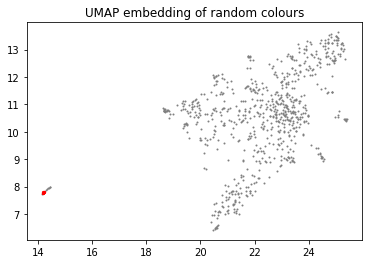

In [72]:
idx = np.where(target == "CTCF")[0]
print(len(idx))

plt.scatter(U[:,  0], U[:,  1], s=1, c="grey")
plt.scatter(U[idx,0], U[idx,1], s=5, c="red")
plt.title('UMAP embedding of random colours');

6


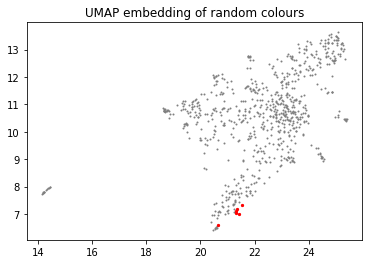

In [76]:
idx = np.where((target == "GATA1") | (target == "GATA2"))[0]
print(len(idx))

plt.scatter(U[:,  0], U[:,  1], s=1, c="grey")
plt.scatter(U[idx,0], U[idx,1], s=5, c="red")
plt.title('UMAP embedding of random colours');

[240 241 242 243 244 245 246 247]
Index(['JUNB', 'JUNB', 'JUNB', 'JUND', 'JUND', 'JUN', 'JUN', 'JUN'], dtype='object', name='Label')


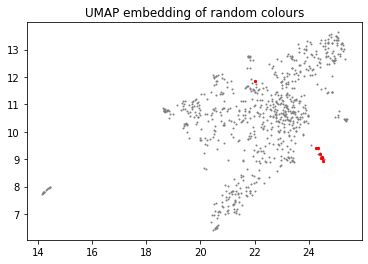

In [78]:
idx = np.where(target.str.contains("JUN"))[0]
print(idx)
print(target[idx])

plt.scatter(U[:,  0], U[:,  1], s=1, c="grey")
plt.scatter(U[idx,0], U[idx,1], s=5, c="red")
plt.title('UMAP embedding of random colours');

In [ ]:
idx = np.where(target == "GATA1")[0]
print(len(idx))

plt.scatter(U[:,  0], U[:,  1], s=1, c="grey")
plt.scatter(U[idx,0], U[idx,1], s=5, c="red")
plt.title('UMAP embedding of random colours');

In [82]:
dat = pd.DataFrame(U, columns=['x', 'y'])
dat['target'] = dat_chipseq_tf.columns.str.split(pat="_").str[0]
dat

,x,y,target
0,23.429262,8.916347,ADNP
1,21.511829,8.365293,AFF1
2,22.300730,10.153115,AFF1
3,22.331676,10.698368,AGO1
4,22.952414,9.771581,ARHGAP35
...,...,...,...
728,23.201530,12.769114,ZNF84
729,22.961102,8.988421,ZSCAN29
730,23.254519,9.080437,ZSCAN29
731,23.687706,12.439151,ZSCAN32


In [86]:
dat[dat.x < 16][dat.y < 9]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,x,y,target
88,14.184479,7.770085,CTCF
89,14.186709,7.777011,CTCF
90,14.203838,7.787235,CTCF
91,14.216488,7.798755,CTCF
92,14.212955,7.798150,CTCF
100,14.445129,7.974895,DEAF1
413,14.350502,7.906053,RAD21
414,14.463675,7.992464,RAD21
415,14.156912,7.739383,RAD21
416,14.237260,7.817462,RAD21


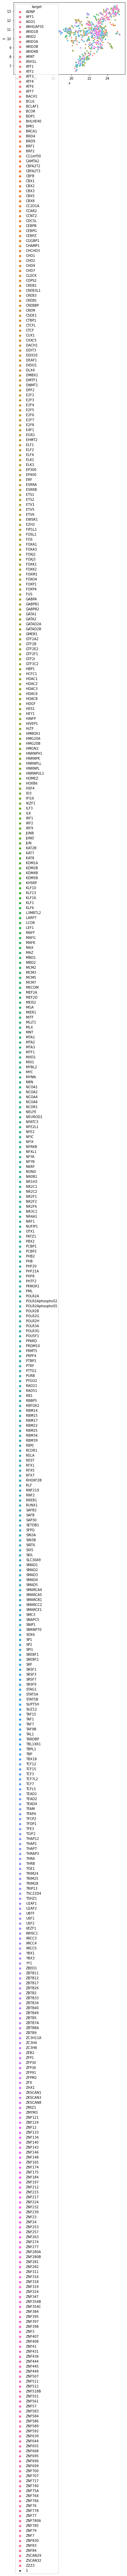

In [41]:
sns.scatterplot(dat, x='x', y='y', hue='target', size=1)

In [30]:
target = dat.columns.str.split(pat="_").str[0]
target = target.to_numpy()

In [ ]:
cmap = plt.get_cmap('viridis')
colors = cmap(np.linspace(0, 1, len(target)))

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

cmap = plt.get_cmap('viridis')
names = ["bob", "joe", "andrew", "pete"]
colors = cmap(np.linspace(0, 1, len(names)))
print(colors)
# [[ 0.267004  0.004874  0.329415  1.      ]
#  [ 0.190631  0.407061  0.556089  1.      ]
#  [ 0.20803   0.718701  0.472873  1.      ]
#  [ 0.993248  0.906157  0.143936  1.      ]]

x = np.linspace(0, np.pi*2, 100)
for i, (name, color) in enumerate(zip(names, colors), 1):
    plt.plot(x, np.sin(x)/i, label=name, c=color)
plt.legend()
plt.show()

ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not ['ADNP' 'AFF1' 'AFF1' 'AGO1' 'ARHGAP35' 'ARID1B' 'ARID2' 'ARID3A' 'ARID3B'
 'ARID4B' 'ARID4B' 'ARNT' 'ARNT' 'ARNT' 'ASH1L' 'ATF1' 'ATF1' 'ATF1'
 'ATF1' 'ATF2' 'ATF2' 'ATF3' 'ATF3' 'ATF3' 'ATF3' 'ATF4' 'ATF4' 'ATF6'
 'ATF7' 'BACH1' 'BACH1' 'BCL6' 'BCLAF1' 'BCLAF1' 'BCLAF1' 'BCOR' 'BDP1'
 'BHLHE40' 'BMI1' 'BRCA1' 'BRCA1' 'BRD4' 'BRD9' 'BRF1' 'BRF2' 'C11orf30'
 'CAMTA2' 'CBFA2T2' 'CBFA2T3' 'CBFB' 'CBX1' 'CBX2' 'CBX3' 'CBX3' 'CBX5'
 'CBX8' 'CC2D1A' 'CCAR2' 'CCNT2' 'CDC5L' 'CEBPB' 'CEBPB' 'CEBPB' 'CEBPG'
 'CEBPG' 'CEBPG' 'CEBPZ' 'CGGBP1' 'CHAMP1' 'CHAMP1' 'CHCHD3' 'CHD1' 'CHD2'
 'CHD4' 'CHD7' 'CLOCK' 'COPS2' 'CREB1' 'CREB1' 'CREB3L1' 'CREB3' 'CREB5'
 'CREBBP' 'CREM' 'CSDE1' 'CSDE1' 'CTBP1' 'CTCFL' 'CTCF' 'CTCF' 'CTCF'
 'CTCF' 'CTCF' 'CUX1' 'CUX1' 'CXXC5' 'DACH1' 'DDIT3' 'DDX20' 'DDX20'
 'DEAF1' 'DEAF1' 'DIDO1' 'DLX4' 'DMBX1' 'DMTF1' 'DNMT1' 'DPF2' 'DPF2'
 'E2F1' 'E2F1' 'E2F3' 'E2F4' 'E2F4' 'E2F5' 'E2F5' 'E2F6' 'E2F6' 'E2F7'
 'E2F8' 'E4F1' 'E4F1' 'EGR1' 'EGR1' 'EGR1' 'EHMT2' 'ELF1' 'ELF1' 'ELF1'
 'ELF1' 'ELF2' 'ELF4' 'ELF4' 'ELF4' 'ELK1' 'ELK1' 'ELK3' 'EP300' 'EP300'
 'EP400' 'ERF' 'ERF' 'ESRRA' 'ESRRB' 'ETS1' 'ETS2' 'ETV1' 'ETV5' 'ETV6'
 'ETV6' 'ETV6' 'EWSR1' 'EZH2' 'FIP1L1' 'FOSL1' 'FOSL1' 'FOS' 'FOXA1'
 'FOXA3' 'FOXA3' 'FOXJ2' 'FOXJ3' 'FOXK1' 'FOXK2' 'FOXK2' 'FOXM1' 'FOXM1'
 'FOXO4' 'FOXP1' 'FOXP4' 'FUS' 'GABPA' 'GABPA' 'GABPB1' 'GABPB1' 'GABPB2'
 'GATA1' 'GATA1' 'GATA2' 'GATA2' 'GATA2' 'GATA2' 'GATAD2A' 'GATAD2B'
 'GMEB1' 'GMEB1' 'GTF2A2' 'GTF2B' 'GTF2E2' 'GTF2F1' 'GTF2F1' 'GTF2F1'
 'GTF2I' 'GTF3C2' 'HBP1' 'HCFC1' 'HDAC1' 'HDAC1' 'HDAC1' 'HDAC1' 'HDAC2'
 'HDAC2' 'HDAC2' 'HDAC2' 'HDAC3' 'HDAC6' 'HDAC8' 'HDAC8' 'HDGF' 'HDGF'
 'HES1' 'HEY1' 'HINFP' 'HIVEP1' 'HLTF' 'HMBOX1' 'HMG20A' 'HMG20A' 'HMG20B'
 'HMGN3' 'HNRNPH1' 'HNRNPK' 'HNRNPLL' 'HNRNPL' 'HNRNPUL1' 'HOMEZ' 'HOXB6'
 'HSF4' 'ID3' 'ID3' 'IFI16' 'IKZF1' 'IKZF1' 'ILF3' 'ILK' 'IRF1' 'IRF1'
 'IRF2' 'IRF2' 'IRF9' 'JUNB' 'JUNB' 'JUNB' 'JUND' 'JUND' 'JUN' 'JUN' 'JUN'
 'KAT2B' 'KAT7' 'KAT8' 'KDM1A' 'KDM1A' 'KDM1A' 'KDM2B' 'KDM4B' 'KDM4B'
 'KDM5B' 'KHSRP' 'KLF10' 'KLF13' 'KLF16' 'KLF1' 'KLF6' 'L3MBTL2' 'LARP7'
 'LCOR' 'LEF1' 'LEF1' 'MAFF' 'MAFG' 'MAFK' 'MAX' 'MAX' 'MAX' 'MAX' 'MAZ'
 'MAZ' 'MAZ' 'MBD1' 'MBD2' 'MCM2' 'MCM2' 'MCM3' 'MCM5' 'MCM5' 'MCM7'
 'MCM7' 'MCM7' 'MECOM' 'MEF2A' 'MEF2D' 'MEIS2' 'MGA' 'MIER1' 'MITF' 'MITF'
 'MLLT1' 'MLLT1' 'MLX' 'MLX' 'MNT' 'MNT' 'MNT' 'MTA1' 'MTA2' 'MTA2' 'MTA3'
 'MTF1' 'MXD1' 'MXI1' 'MYBL2' 'MYBL2' 'MYC' 'MYC' 'MYC' 'MYC' 'MYNN'
 'MYNN' 'MYNN' 'NBN' 'NCOA1' 'NCOA1' 'NCOA1' 'NCOA2' 'NCOA2' 'NCOA4'
 'NCOA6' 'NCOR1' 'NCOR1' 'NCOR1' 'NCOR1' 'NELFE' 'NEUROD1' 'NFATC3'
 'NFATC3' 'NFE2L1' 'NFE2' 'NFE2' 'NFE2' 'NFIC' 'NFIX' 'NFRKB' 'NFRKB'
 'NFXL1' 'NFXL1' 'NFYA' 'NFYA' 'NFYB' 'NKRF' 'NONO' 'NONO' 'NR0B1' 'NR1H2'
 'NR2C1' 'NR2C1' 'NR2C2' 'NR2C2' 'NR2C2' 'NR2F1' 'NR2F2' 'NR2F6' 'NR2F6'
 'NR2F6' 'NR3C1' 'NR3C1' 'NR3C1' 'NR4A1' 'NR4A1' 'NR4A1' 'NRF1' 'NRF1'
 'NRF1' 'NRF1' 'NUFIP1' 'OTX1' 'PATZ1' 'PBX2' 'PCBP1' 'PCBP2' 'PHB2' 'PHB'
 'PHF20' 'PHF21A' 'PHF8' 'PHTF2' 'PKNOX1' 'PML' 'POLR2A' 'POLR2A' 'POLR2A'
 'POLR2A' 'POLR2A' 'POLR2A' 'POLR2AphosphoS2' 'POLR2AphosphoS2'
 'POLR2AphosphoS5' 'POLR2B' 'POLR2G' 'POLR2H' 'POLR3A' 'POLR3G' 'POU5F1'
 'PPARD' 'PRDM10' 'PRMT5' 'PRPF4' 'PTBP1' 'PTRF' 'PTTG1' 'PURB' 'PYGO2'
 'PYGO2' 'RAD21' 'RAD21' 'RAD21' 'RAD21' 'RAD51' 'RB1' 'RBBP5' 'RBFOX2'
 'RBM14' 'RBM15' 'RBM17' 'RBM22' 'RBM25' 'RBM34' 'RBM39' 'RBPJ' 'RCOR1'
 'RCOR1' 'RELA' 'REST' 'REST' 'REST' 'REST' 'RFX1' 'RFX1' 'RFX5' 'RFX7'
 'RHOXF2B' 'RLF' 'RNF219' 'RNF2' 'RNF2' 'RNF2' 'RNF2' 'RNF2' 'RREB1'
 'RUNX1' 'RUNX1' 'SAFB2' 'SAFB' 'SAP30' 'SETDB1' 'SETDB1' 'SETDB1' 'SFPQ'
 'SIN3A' 'SIN3A' 'SIN3B' 'SIRT6' 'SIRT6' 'SIX5' 'SIX5' 'SKIL' 'SLC30A9'
 'SMAD1' 'SMAD2' 'SMAD3' 'SMAD3' 'SMAD4' 'SMAD4' 'SMAD5' 'SMARCA4'
 'SMARCA4' 'SMARCA4' 'SMARCA5' 'SMARCB1' 'SMARCC2' 'SMARCE1' 'SMC3'
 'SNAPC5' 'SNIP1' 'SNRNP70' 'SOX6' 'SP1' 'SP1' 'SP1' 'SP2' 'SPI1' 'SREBF1'
 'SREBF2' 'SRF' 'SRF' 'SRF' 'SRSF1' 'SRSF3' 'SRSF7' 'SRSF9' 'STAG1'
 'STAT5A' 'STAT5B' 'SUPT5H' 'SUZ12' 'SUZ12' 'TAF15' 'TAF1' 'TAF7' 'TAF7'
 'TAF9B' 'TAL1' 'TAL1' 'TARDBP' 'TARDBP' 'TARDBP' 'TBL1XR1' 'TBL1XR1'
 'TBPL1' 'TBP' 'TBX18' 'TCF12' 'TCF12' 'TCF15' 'TCF3' 'TCF7L2' 'TCF7'
 'TCFL5' 'TEAD1' 'TEAD1' 'TEAD2' 'TEAD4' 'TEAD4' 'TFAM' 'TFAP4' 'TFCP2'
 'TFDP1' 'TFDP1' 'TFE3' 'TGIF2' 'THAP12' 'THAP1' 'THAP7' 'THRAP3' 'THRA'
 'THRB' 'TOE1' 'TOE1' 'TRIM24' 'TRIM24' 'TRIM25' 'TRIM25' 'TRIM28'
 'TRIM28' 'TRIM28' 'TRIP13' 'TSC22D4' 'TSHZ1' 'U2AF1' 'U2AF2' 'UBTF'
 'UBTF' 'USF1' 'USF1' 'USF2' 'USF2' 'USF2' 'VEZF1' 'WHSC1' 'XRCC3' 'XRCC4'
 'XRCC5' 'YBX1' 'YBX3' 'YY1' 'YY1' 'YY1' 'ZBED1' 'ZBTB11' 'ZBTB11'
 'ZBTB11' 'ZBTB11' 'ZBTB12' 'ZBTB17' 'ZBTB26' 'ZBTB2' 'ZBTB33' 'ZBTB33'
 'ZBTB34' 'ZBTB40' 'ZBTB40' 'ZBTB40' 'ZBTB49' 'ZBTB5' 'ZBTB5' 'ZBTB7A'
 'ZBTB8A' 'ZBTB9' 'ZC3H11A' 'ZC3H4' 'ZC3H8' 'ZC3H8' 'ZEB2' 'ZEB2' 'ZFP1'
 'ZFP30' 'ZFP36' 'ZFP91' 'ZFP91' 'ZFPM2' 'ZFX' 'ZFX' 'ZHX1' 'ZKSCAN1'
 'ZKSCAN3' 'ZKSCAN8' 'ZMIZ1' 'ZMIZ1' 'ZMYM3' 'ZNF121' 'ZNF124' 'ZNF12'
 'ZNF133' 'ZNF134' 'ZNF140' 'ZNF143' 'ZNF143' 'ZNF146' 'ZNF148' 'ZNF165'
 'ZNF174' 'ZNF175' 'ZNF184' 'ZNF184' 'ZNF184' 'ZNF197' 'ZNF212' 'ZNF215'
 'ZNF217' 'ZNF224' 'ZNF232' 'ZNF239' 'ZNF23' 'ZNF24' 'ZNF24' 'ZNF24'
 'ZNF24' 'ZNF253' 'ZNF257' 'ZNF263' 'ZNF263' 'ZNF274' 'ZNF274' 'ZNF277'
 'ZNF280A' 'ZNF280B' 'ZNF281' 'ZNF282' 'ZNF311' 'ZNF316' 'ZNF316' 'ZNF318'
 'ZNF318' 'ZNF319' 'ZNF324' 'ZNF347' 'ZNF354B' 'ZNF354B' 'ZNF354C'
 'ZNF384' 'ZNF395' 'ZNF397' 'ZNF398' 'ZNF3' 'ZNF3' 'ZNF407' 'ZNF407'
 'ZNF408' 'ZNF41' 'ZNF431' 'ZNF436' 'ZNF444' 'ZNF445' 'ZNF449' 'ZNF507'
 'ZNF507' 'ZNF511' 'ZNF512' 'ZNF512' 'ZNF518B' 'ZNF551' 'ZNF561' 'ZNF57'
 'ZNF583' 'ZNF584' 'ZNF586' 'ZNF589' 'ZNF592' 'ZNF639' 'ZNF639' 'ZNF639'
 'ZNF639' 'ZNF644' 'ZNF655' 'ZNF668' 'ZNF695' 'ZNF696' 'ZNF699' 'ZNF700'
 'ZNF707' 'ZNF717' 'ZNF740' 'ZNF740' 'ZNF740' 'ZNF75A' 'ZNF764' 'ZNF766'
 'ZNF76' 'ZNF778' 'ZNF77' 'ZNF780A' 'ZNF785' 'ZNF79' 'ZNF7' 'ZNF830'
 'ZNF830' 'ZNF830' 'ZNF83' 'ZNF84' 'ZSCAN29' 'ZSCAN29' 'ZSCAN32' 'ZZZ3']

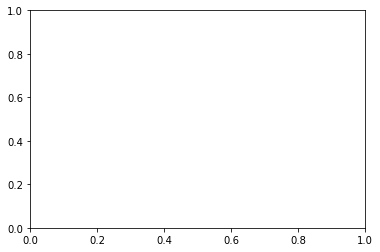

In [32]:
plt.scatter(U[:,0], U[:,1], s=1, c=target)
plt.title('UMAP embedding of random colours');

In [3]:
from sklearn.manifold import TSNE
from sklearn.metrics  import pairwise_distances

In [4]:
mat = dat.to_numpy()
print(mat.shape)

(86628, 16)


In [5]:
mat = dat.to_numpy()
mat = mat.T
print(mat.shape)

(16, 86628)


In [7]:
mat = dat.to_numpy()
mat = mat.T
mat = pairwise_distances(mat, metric='jaccard', n_jobs=-1)
print(mat.shape)

(16, 16)


In [14]:
mat

array([[0.        , 0.81836041, 0.88718419, 0.64512511, 0.8051138 ,
        0.64433807, 0.97985877, 0.76218684, 0.81434876, 0.5495476 ,
        0.62105807, 0.70645087, 0.7153329 , 0.77460219, 0.60174203,
        0.68600038],
       [0.81836041, 0.        , 0.95559979, 0.88541338, 0.94375346,
        0.87547837, 0.99347843, 0.83937779, 0.94101592, 0.82950154,
        0.87157524, 0.89397575, 0.90085438, 0.92336027, 0.81226179,
        0.89515543],
       [0.88718419, 0.95559979, 0.        , 0.91865054, 0.95750314,
        0.8898155 , 0.94618585, 0.94536641, 0.96566475, 0.88504179,
        0.85725121, 0.89553278, 0.80888672, 0.95791575, 0.87376745,
        0.91954208],
       [0.64512511, 0.88541338, 0.91865054, 0.        , 0.63315054,
        0.66264977, 0.98183671, 0.661135  , 0.76000133, 0.74384292,
        0.80153535, 0.69104355, 0.86976409, 0.57433594, 0.75935689,
        0.62752838],
       [0.8051138 , 0.94375346, 0.95750314, 0.63315054, 0.        ,
        0.82063119, 0.98707947, 

In [10]:
model = TSNE(metric="precomputed")
X     = model.fit_transform(mat)
X

/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:827: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  FutureWarning,


array([[ -97.036224 ,    5.077477 ],
       [ -17.95879  ,  119.264114 ],
       [ -30.373419 ,   45.581135 ],
       [   0.8904848,  -76.757385 ],
       [-121.968704 , -129.55305  ],
       [  45.49345  , -137.19394  ],
       [ -38.810112 , -143.36552  ],
       [-162.66327  ,   37.825687 ],
       [  28.829025 ,   -5.6137123],
       [-154.25612  ,  -49.12855  ],
       [ -77.54597  ,  -72.038895 ],
       [  80.75867  ,  -63.549175 ],
       [ -35.72121  ,  -20.803232 ],
       [ 101.76542  ,   14.8587675],
       [  44.040844 ,   69.677315 ],
       [ -95.18677  ,   86.98054  ]], dtype=float32)

In [11]:
X.shape

(16, 2)

In [12]:
import matplotlib.pyplot as plt

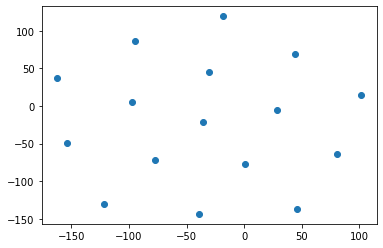

In [13]:
plt.scatter(X[:,0], X[:,1])